<a href="https://colab.research.google.com/github/macrodatascience/python/blob/main/Python_Monte_Carlo_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# !pip install --upgrade pandas
# !pip install --upgrade pandas-datareader

In [57]:
import pandas as pd 
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import style

style.use("ggplot")

start = dt.datetime(2021, 6, 4)
end = dt.datetime(2022, 6, 3)
print(start, end)
# start = '2021-11-30'
# end = '2022-06-03'
nflx = web.DataReader('NFLX', 'yahoo', start = start, end = end)
nflx.head()

2021-06-04 00:00:00 2022-06-03 00:00:00


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-04,501.859985,490.950012,492.000000,494.739990,3160500,494.739990
2021-06-07,496.700012,490.549988,492.920013,494.660004,2791900,494.660004
2021-06-08,498.820007,489.369995,497.000000,492.390015,2374000,492.390015
2021-06-09,496.089996,484.649994,494.500000,485.809998,3055000,485.809998
2021-06-10,490.209991,482.140015,487.170013,487.269989,4382900,487.269989


In [58]:
type(nflx)

pandas.core.frame.DataFrame

In [59]:
nflx['Returns'] = nflx['Close'].pct_change()
nflx['LogReturns'] = np.log(nflx['Close']) - np.log(nflx['Close'].shift(1))

In [60]:
nflx.head(10)

,High,Low,Open,Close,Volume,Adj Close,Returns,LogReturns
Date,,,,,,,,
2021-06-04,501.859985,490.950012,492.000000,494.739990,3160500,494.739990,NaN,NaN
2021-06-07,496.700012,490.549988,492.920013,494.660004,2791900,494.660004,-0.000162,-0.000162
2021-06-08,498.820007,489.369995,497.000000,492.390015,2374000,492.390015,-0.004589,-0.004600
2021-06-09,496.089996,484.649994,494.500000,485.809998,3055000,485.809998,-0.013363,-0.013454
2021-06-10,490.209991,482.140015,487.170013,487.269989,4382900,487.269989,0.003005,0.003001
2021-06-11,491.410004,487.779999,490.000000,488.769989,3124000,488.769989,0.003078,0.003074
2021-06-14,503.500000,486.910004,489.679993,499.890015,4400200,499.890015,0.022751,0.022496
2021-06-15,501.230011,490.399994,501.230011,491.899994,3104100,491.899994,-0.015984,-0.016113
2021-06-16,496.459991,486.279999,495.000000,492.410004,3533200,492.410004,0.001037,0.001036


In [54]:
last_price = nflx['Close'][-1]
last_price

198.97999572753906

In [61]:
nflx['Returns'].std(), nflx['LogReturns'].std()

(0.036376225175627476, 0.04024807033409229)

In [66]:
import math
nflx['Returns'].std()*math.sqrt(252), nflx['LogReturns'].std()*math.sqrt(252)

(0.577454672699983, 0.6389183091254672)

In [38]:
def montecarlo(last_price, vol, nsim, ndays):

  sim_prices = dict()
  for i in range(nsim):
    sim_prices[i]=[]
    for j in range(ndays):
      if j == 0:
        price = last_price * (1+np.random.normal(0, vol))
      else:
        price = price*(1+np.random.normal(0, vol))
      sim_prices[i].append(price)
  return sim_prices

In [23]:
np.random.normal(1,0.05)

1.014131054909825

In [50]:
sim_prices = montecarlo(nflx['Close'][-1], nflx['Returns'].std(), 10000, 252)
df_sim_prices = pd.DataFrame(sim_prices)

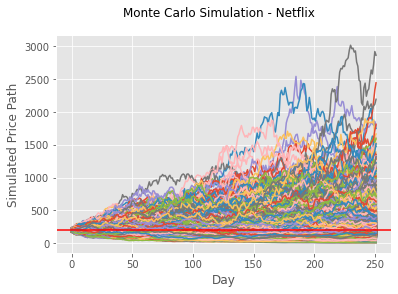

In [55]:
fig = plt.figure()
fig.suptitle('Monte Carlo Simulation - Netflix')
plt.plot(df_sim_prices)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Simulated Price Path')
plt.show()

In [47]:
df_nflx_sim = pd.DataFrame(sim_prices).T
df_nflx_sim

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
0,207.405878,215.635061,225.146100,216.016837,208.184508,211.145585,206.374320,205.914409,196.589457,205.101326,...,133.209461,129.867746,129.748879,125.598794,122.786975,127.580547,129.669456,131.873296,133.763704,140.486025
1,188.075450,191.687997,213.083570,201.263154,201.619491,192.228361,181.451260,167.203225,174.715390,170.747492,...,56.320720,54.675125,59.083792,56.838495,51.656021,53.836030,51.159793,47.567055,48.720922,51.303678
2,203.029145,211.136372,210.664383,194.544463,214.107363,219.143288,238.917817,260.917115,258.363894,250.974511,...,202.177593,190.246083,187.325435,197.188107,184.503955,182.646618,185.906540,178.196395,174.249532,164.287514
3,202.882667,202.624494,210.219193,213.136766,215.528767,235.056917,221.108596,218.445041,217.310541,218.178921,...,195.257016,195.189488,195.027096,195.656553,202.827277,206.881766,213.381082,212.882409,227.137007,207.029775
4,206.817130,212.685345,220.020130,241.446540,245.670600,248.113730,243.005194,253.815043,253.055428,253.596964,...,122.814661,119.159182,121.983362,112.233261,99.057664,96.698709,92.698402,86.449597,86.826363,93.226986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,195.099308,210.964664,209.789268,200.184026,189.647283,197.958995,207.565554,213.203983,209.372935,201.866404,...,242.208330,231.233924,228.354093,225.557524,232.437463,226.269190,219.510229,224.358742,203.880571,208.746007
9996,196.135998,188.334210,182.995287,184.254576,201.743821,198.222843,197.664054,195.632611,200.597321,206.170892,...,208.003614,199.984652,194.521319,197.660839,199.622472,192.839466,191.070859,195.413041,199.017892,210.752025
9997,193.207461,195.750618,207.735572,219.163554,214.786411,215.924892,209.897986,213.752686,221.597683,210.289431,...,156.653111,149.581526,146.790585,136.108292,152.197322,151.101046,161.324123,164.292335,164.322007,148.221366
9998,191.484225,180.514270,169.068018,183.243954,176.714378,195.107388,201.110842,189.178848,178.185365,181.994941,...,242.009031,242.598150,234.124338,220.325716,200.424318,180.445822,167.705294,169.972633,163.928778,164.724174
